Which object do you want to use to generate data ?

>> Poivre


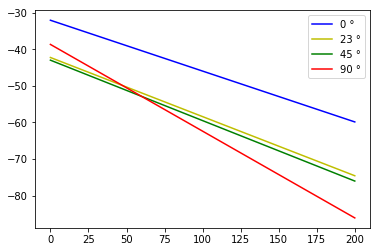

Choose a distance >> 5
Correct distance
Choose a distance >> 15
Correct distance
Choose a distance >> 25
Correct distance
Choose a distance >> 40
Correct distance
Choose a distance >> done
5
15
25
40
--------0°--------
5 cm
XP : -31.73
Old Function : -50.850958571268734
15 cm
XP : -31.175
Old Function : -70.91886980345363
25 cm
XP : -35.305
Old Function : -80.24991714253747
40 cm
XP : -35.205
Old Function : -88.83528543651762
--------23°--------
5 cm
XP : -35.26
Old Function : -48.82975636941529
15 cm
XP : -36.91
Old Function : -68.10001682944721
25 cm
XP : -51.13
Old Function : -77.06017768069971
40 cm
XP : -49.27
Old Function : -85.3042984193325
--------45°--------
5 cm
XP : -41.56
Old Function : -43.40400810342452
15 cm
XP : -40.74
Old Function : -60.53304177778078
25 cm
XP : -45.515
Old Function : -68.49758887184214
40 cm
XP : -55.565
Old Function : -75.82565908866088
--------90°--------
5 cm
XP : -27.41
Old Function : -25.425479285634367
15 cm
XP : -44.615
Old Function : -35.45943

In [21]:
import pandas as pd
from pandas import DataFrame
import numpy as np

import datetime
import pandas_datareader as pdr
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

import glob, os
import time
import sys
import inspect
import fileinput
import scipy
from scipy import stats
import math

from progressbar import AnimatedMarker, Bar, BouncingBar, Counter, ETA, \
    AdaptiveETA, FileTransferSpeed, FormatLabel, Percentage, \
    ProgressBar, ReverseBar, RotatingMarker, \
SimpleProgress, Timer

#fonction qui renvoie le bon path
def getPath() :
    
    #Renvoie le path courant aussi
    #print(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))))

    #Path courant
    cwd = os.getcwd()
    #C:\Users\laure\WebSocketClientCSharp\WebSocketClient\generate

    #On va changer de path (cwd, '../WebSocketClient/bin/Debug/xp/'))
    os.chdir('../xp/')
    
    #print("Path changed. New path is : "+ os.getcwd())

    return;

def verifyFiles() :
    
    ok = False
    print("Which object do you want to use to generate data ?\n")
    
    while(ok is False):
        
        answer = input(">> ")
        
        if answer == '__pycache__':
            print("Do not try to fool me !")
        
        if answer == 'exit':
            sys.exit("The program will shut down now.")
        
        #Si la réponse est un dossier qui existe
        if os.path.isdir(answer):
            #On compte le nombre de fichier à l'intérieur (non récursif)
            numfiles = len([f for f in os.listdir(answer) if os.path.isfile(os.path.join(answer, f)) and f[0] != '.'])        
        
            #Le nombre total de fichiers csv
            if numfiles != 52:
                print("Not enough data ! Make sure you collected all the necessary data before you execute this script")
                print("Please, enter the name of the directory again")

            #Si le dossier existe ET qu'il y a assez de fichiers pour générer les données alors c'est bon
            else:
                ok = True
                
        #Si le dossier n'existe pas alors cela veut dire que l'on ne possède pas assez de données
        else:
            print("The data's object doesn't exist. Make sure you collected all the necessary data before you execute this script")
            print("Please, enter the name of the directory again")
    
    os.chdir(answer)
    return;

def testFullFunction(functions) :
    
    ok = False
    customDistances = []
    realDistances = ['5','15','25','40','60','80','100','120','140','160','180','200']
    while ok is False :
        
        answer = input("Choose a distance >> ")
        
        for i in realDistances :
            if answer == i:
                customDistances.append(answer)
                print("Correct distance")
                
            if answer == 'exit':
                sys.exit("The program will shut down now.")
            
            if answer == 'done':
                ok = True
                
    
    for p in customDistances:
        print(p)
        
    df = pd.read_csv('data/finalData.csv',sep=';',index_col=0)

    #print("RSSI(x) = (-9,1333*ln(x) - 10,726) * (1+cos(a) + noise_function())")
    
    #print("We will try to figure out if the first part of the equation is correct : RSSI(x) = (-9,1333*ln(x) - 10,726)")
    
    for angle in functions:
        
        print("--------" + angle + "°--------")
        
        #On a l'angle courant avec son dictionnaire de données
        #Ex : 0° (angle) --> [slope->slope;intercept->intercept...]
        
        for currentDistance in customDistances:
            #RSSI enregistré en réel
            
            print(currentDistance + ' cm')

            print("XP : " + str(df[angle].get(float(currentDistance))))
            
            #RSSI obtenu par le calcul
            
            #on converti l'angle en Radian
            a = math.radians(float(angle))
            
            lnx = math.log(float(currentDistance))

            regression = (1+(math.cos(a)))

            temp = (-9.1333* lnx - 10.726) * regression
            print("Old Function : " + str(temp))
                
        #for key,val in functions[angle].items():
        #    print(key, "=>", val)  
    
    
    return;

#def testFirstPartFunction(functions) :
    
    
#    return;

def generateRegress(functions) :
    
    #Separé par des ; donc l'index est la première colonne
    df = pd.read_csv('data/finalData.csv',sep=';',index_col=0)
    
    angles = ['0','23','45','90']
    numpyAngles = np.array(['0','23','45','90'])

    distances = [0,5,15,25,40,60,80,100,120,140,160,180,200]
    numpyDistances = np.array([0,5,15,25,40,60,80,100,120,140,160,180,200])

    y = np.array([])

    colors = ['b','y','g','r']
    i = 0

    #Pour tous les angles (ie. pour toutes les courbes) on va faire une régression linéaire
    for a in angles:
        
        #On va faire un tableau de toutes les valeurs RSSI
        for d in distances :
            
            #On récupère le RSSI pour le couple angle/distance
            temp = df[a].get(d)
            
            #On le push dans le numpy array
            y = np.append(y,[temp])
        
        #Une fois qu'on a rempli tous les RSSI pour cet angle : on peut créer la régression linéaire
        
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(numpyDistances,y)
        
        values = {"slope" : slope,
                  "intercept" : intercept,
                  "r_value" : r_value,
                  "p_value" : p_value,
                  "std_err" : std_err}
        
        functions[a] = values
        
        plt.plot(numpyDistances, intercept + slope*numpyDistances, colors[i], label=a+' °')
        i = i+1
        
        #On vide le tableau des Y : dans Y on a un tableau vide
        y = np.delete(y,[0,1,2,3,4,5,6,7,8,9,10,11,12])

    #On fait la meme chose pour tous les angles qui suivent...
    
    #On affiche les plots
    plt.legend()
    plt.show()
    
    return;

os.chdir('C:/Users/laure/WebSocketClientCSharp/WebSocketClient/WebSocketClient/bin/Debug/generate')

functions = {}

getPath()

verifyFiles()

generateRegress(functions)

testFullFunction(functions)

#testFirstPartFunction(functions)

os.chdir('../')